In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

matplotlib.rc("axes", unicode_minus = False)

In [3]:
df1 = pd.read_csv("/home/piai/바탕화면/반도체 공정 프로젝트/B1_반도체/01 Oxidation.csv")
df2 = pd.read_csv("/home/piai/바탕화면/반도체 공정 프로젝트/B1_반도체/02 Photo_softbake.csv")
df3 = pd.read_csv("/home/piai/바탕화면/반도체 공정 프로젝트/B1_반도체/03 Photo_lithograpy.csv")
df4 = pd.read_csv("/home/piai/바탕화면/반도체 공정 프로젝트/B1_반도체/04 Etching.csv")
df5 = pd.read_csv("/home/piai/바탕화면/반도체 공정 프로젝트/B1_반도체/05 Ion_Implantation.csv")
df6 = pd.read_csv("/home/piai/바탕화면/반도체 공정 프로젝트/B1_반도체/06 Inspect.csv")

In [4]:
df = pd.merge(df1, df2, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df3, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df4, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df5, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df6, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])

In [5]:
df.dropna(subset="Thin F2", inplace=True) # 다른 변수들과의 연관성을 찾지못함, 한 행에 여러 열들 결측값 가짐
# pd.set_option('display.max_row', 200)
# pd.set_option('display.max_columns', 200)

In [6]:
df['Ox_Chamber'] = df['Ox_Chamber'].astype('str')
df['photo_soft_Chamber'] = df['photo_soft_Chamber'].astype('str')
df['lithography_Chamber'] = df['lithography_Chamber'].astype('str')
df['Etching_Chamber'] = df['Etching_Chamber'].astype('str')
df['Chamber_Num'] = df['Chamber_Num'].astype('str')
df['path'] = df['Ox_Chamber']+df['photo_soft_Chamber']+df['lithography_Chamber']+df['Etching_Chamber']+df['Chamber_Num']

In [7]:
df.drop(df[df['Oxid_time']<0].index, inplace=True) # 산화시간이 음수
df.drop(df[df['Target']==0].index, inplace=True) # target 값이 0
df.drop(columns = ["Wafer_map","Error_message"],inplace=True) # 웨이퍼맵, 에러메시지

In [8]:
# # 불필요한 열 제거 
# df.drop(columns=["No_Die", "Lot_Num", "Wafer_Num"], inplace=True)

In [9]:
# 시간 데이터 datetime 유형으로 변환
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y')

# 195이상 = 불량(1), 195미만 = 양품(0)
df.loc[df['Target'] >= 195, '불량_195이상'] ='불량'
df.loc[df['Target'] < 195, '불량_195이상'] ='양품'

In [10]:
df.loc[df['Thin F4']<0, 'Thin F4']=df['Thin F4'].median()
df.loc[df['Flux90s']<0, 'Flux90s']=df['Flux90s'].median()
df.loc[df['Flux160s']<0, 'Flux160s']=df['Flux160s'].median()
df.loc[df['Flux160s']<5, 'Flux160s']=df['Flux160s'].median()

In [11]:
df['Thin F1'].fillna(df['Thin F1'].median(), inplace=True)
df['Thin F3'].fillna(df['Thin F3'].median(), inplace=True)
df['Flux60s'].fillna(df['Flux90s'].median(), inplace=True)
df['Flux90s'].fillna(df['Flux90s'].median(), inplace=True)
df['Flux480s'].fillna(df['Flux90s'].median(), inplace=True)
df['Flux840s'].fillna(df['Flux90s'].median(), inplace=True)

In [12]:
negative_values = df.select_dtypes(include=['number']).lt(0)

# 음수 값을 가진 열 목록 출력
columns_with_negative_values = negative_values.any()
print("Columns with negative values:")
print(columns_with_negative_values[columns_with_negative_values].index.tolist())

# 각 열에서 음수 값을 포함한 행 수 출력
print("\nNumber of rows with negative values in each column:")
print(negative_values.sum())

Columns with negative values:
[]

Number of rows with negative values in each column:
Temp_OXid            0
ppm                  0
Pressure             0
Oxid_time            0
thickness            0
Lot_Num              0
Wafer_Num            0
resist_target        0
N2_HMDS              0
pressure_HMDS        0
temp_HMDS            0
temp_HMDS_bake       0
time_HMDS_bake       0
spin1                0
spin2                0
spin3                0
photoresist_bake     0
temp_softbake        0
time_softbake        0
Line_CD              0
Wavelength           0
Resolution           0
Energy_Exposure      0
Thin F4              0
Thin F3              0
Thin F2              0
Thin F1              0
Temp_Etching         0
Source_Power         0
Selectivity          0
Flux60s              0
Flux90s              0
Flux160s             0
Flux480s             0
Flux840s             0
input_Energy         0
Temp_implantation    0
Furance_Temp         0
RTA_Temp             0
Target           

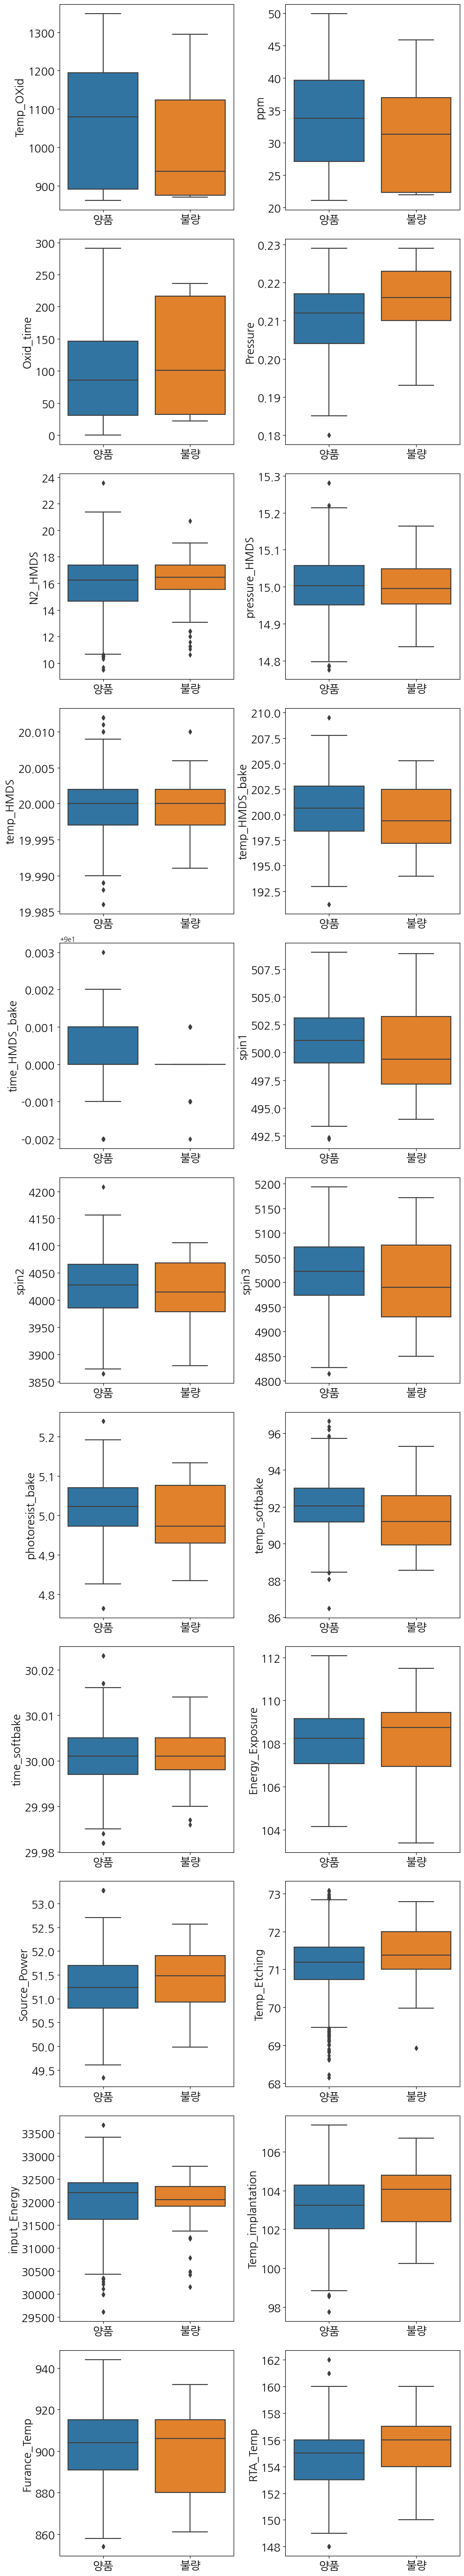

In [22]:
variables = [ 'Temp_OXid', 'ppm', 'Oxid_time', 'Pressure', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS',
             'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake',
             'temp_softbake', 'time_softbake', 'Energy_Exposure', 'Source_Power', 'Temp_Etching', 
             'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp']
# 열의 수 설정
num_cols = 2

# 행의 수 계산
num_rows = -(-len(variables) // num_cols)  # 올림 연산

# 그래프를 한 행에 num_cols개씩 그리기
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))
for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=17)  # x축과 y축 모두의 글꼴 크기 설정

# for loop을 이용하여 각 변수별 boxplot 생성
for idx, var in enumerate(variables):
    sns.boxplot(x='불량_195이상', y=var, data=df, ax=axes[idx//num_cols, idx%num_cols])
    axes[idx//num_cols, idx%num_cols].set_xlabel('')
    axes[idx//num_cols, idx%num_cols].set_ylabel(var, fontsize=17)
#     axes[idx//num_cols, idx%num_cols].set_title(f'Boxplot of a by {var}')

# 빈 서브플롯 숨기기
for i in range(len(variables), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from scipy.stats import mannwhitneyu

# '불량_195이상' 변수를 기준으로 두 그룹으로 나누기
group1 = df[df['불량_195이상'] == '양품']
group2 = df[df['불량_195이상'] == '불량']

# 변수 선택
variables = ['Temp_OXid', 'ppm', 'Oxid_time', 'Pressure', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS',
             'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake',
             'temp_softbake', 'time_softbake', 'Energy_Exposure', 'Source_Power', 'Temp_Etching', 
             'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp']

# Mann-Whitney U 테스트 수행
results = {}
for var in variables:
    stat, p_value = mannwhitneyu(group1[var], group2[var], alternative='two-sided')
    results[var] = {'statistic': stat, 'p_value': p_value}

# 결과 출력
results_df = pd.DataFrame(results).T
print(results_df)


                   statistic       p_value
Temp_OXid           118643.0  5.569618e-06
ppm                 108909.5  7.726796e-03
Oxid_time            85026.0  5.167998e-02
Pressure             65793.0  1.508033e-08
N2_HMDS              89517.0  2.808108e-01
pressure_HMDS        95947.5  8.710695e-01
temp_HMDS            90141.5  3.362960e-01
temp_HMDS_bake      109061.0  7.082000e-03
time_HMDS_bake       99583.0  3.454774e-01
spin1               112432.5  8.269472e-04
spin2               104905.0  5.863217e-02
spin3               110576.0  2.832781e-03
photoresist_bake    115814.0  6.436202e-05
temp_softbake       118124.0  8.914790e-06
time_softbake        89599.0  2.873082e-01
Energy_Exposure      84789.0  4.649275e-02
Source_Power         80058.0  3.685567e-03
Temp_Etching         76017.0  2.298452e-04
input_Energy         98320.0  5.351621e-01
Temp_implantation    77086.0  5.062496e-04
Furance_Temp        100952.0  2.591840e-01
RTA_Temp             82334.0  1.297096e-02


In [17]:
# p-value에 따라 결과를 정렬
sorted_results_df = results_df.sort_values(by='p_value')

# 결과 출력
print(sorted_results_df)

                   statistic       p_value
Pressure             65793.0  1.508033e-08
Temp_OXid           118643.0  5.569618e-06
temp_softbake       118124.0  8.914790e-06
photoresist_bake    115814.0  6.436202e-05
Temp_Etching         76017.0  2.298452e-04
Temp_implantation    77086.0  5.062496e-04
spin1               112432.5  8.269472e-04
spin3               110576.0  2.832781e-03
Source_Power         80058.0  3.685567e-03
temp_HMDS_bake      109061.0  7.082000e-03
ppm                 108909.5  7.726796e-03
RTA_Temp             82334.0  1.297096e-02
Energy_Exposure      84789.0  4.649275e-02
Oxid_time            85026.0  5.167998e-02
spin2               104905.0  5.863217e-02
Furance_Temp        100952.0  2.591840e-01
N2_HMDS              89517.0  2.808108e-01
time_softbake        89599.0  2.873082e-01
temp_HMDS            90141.5  3.362960e-01
time_HMDS_bake       99583.0  3.454774e-01
input_Energy         98320.0  5.351621e-01
pressure_HMDS        95947.5  8.710695e-01


In [18]:
df.describe()

,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,resist_target,N2_HMDS,pressure_HMDS,...,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target
count,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,...,1.693000e+03,1.693000e+03,1.693000e+03,1.693000e+03,1.693000e+03,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000
mean,1068.749850,33.389557,0.210766,98.988777,711.066221,16.252215,27.481985,1.194009,16.068215,15.003415,...,1.185190e+16,8.062053e+16,4.494859e+17,3.000628e+17,5.996937e+17,32005.725385,103.163752,901.151211,154.700532,102.493798
std,149.706498,8.076413,0.009229,72.195086,7.920728,9.111449,15.566617,0.416287,2.233178,0.077702,...,4.929982e+15,5.385674e+16,3.296111e+17,5.448513e+15,1.260448e+16,589.177245,1.652589,18.512683,2.404828,61.640109
min,862.011276,21.070000,0.180000,0.000000,681.435000,1.000000,1.000000,0.054360,9.497000,14.776000,...,1.970000e+15,3.846247e+09,1.104495e+07,8.137500e+16,8.137500e+16,29604.262000,97.744000,854.000000,148.000000,6.000000
25%,889.141908,26.060000,0.204000,31.000000,706.977000,8.000000,14.000000,0.883390,14.710000,14.951000,...,8.440000e+15,3.400000e+16,1.330000e+17,2.990000e+17,6.000000e+17,31638.792000,102.064000,890.000000,153.000000,64.000000
50%,1073.848968,33.590000,0.212000,86.000000,711.695000,16.000000,28.000000,1.116280,16.300000,15.003000,...,1.180000e+16,8.137500e+16,4.540000e+17,3.000000e+17,6.000000e+17,32200.371000,103.298000,904.000000,155.000000,94.000000
75%,1191.036987,39.510000,0.217000,148.000000,715.478000,24.000000,41.000000,1.489120,17.367000,15.056000,...,1.520000e+16,1.210000e+17,6.740000e+17,3.010000e+17,6.000000e+17,32415.844000,104.322000,915.000000,156.000000,126.000000
max,1348.471208,49.910000,0.229000,291.000000,737.402000,32.000000,54.000000,2.394320,23.573000,15.281000,...,8.137500e+16,2.720000e+17,1.400000e+18,3.040000e+17,6.000000e+17,33675.551000,107.376000,944.000000,162.000000,495.000000


In [20]:
selected_columns = ['Pressure', 'Temp_OXid', 'temp_softbake', 'photoresist_bake', 'Temp_Etching', 'Temp_implantation',
                    'spin1', 'spin3', 'Source_Power', 'temp_HMDS_bake', 'ppm', 'RTA_Temp', 'Energy_Exposure']

selected_df = df[selected_columns]
description = selected_df.describe()
print(description)


          Pressure    Temp_OXid  temp_softbake  photoresist_bake  \
count  1693.000000  1693.000000    1693.000000       1693.000000   
mean      0.210766  1068.749850      91.968425          5.018705   
std       0.009229   149.706498       1.455383          0.070291   
min       0.180000   862.011276      86.498000          4.765000   
25%       0.204000   889.141908      91.072000          4.969000   
50%       0.212000  1073.848968      92.033000          5.021000   
75%       0.217000  1191.036987      92.998000          5.071000   
max       0.229000  1348.471208      96.653000          5.239000   

       Temp_Etching  Temp_implantation        spin1        spin3  \
count   1693.000000        1693.000000  1693.000000  1693.000000   
mean      71.154075         103.163752   500.815121  5019.106823   
std        0.792881           1.652589     3.001083    68.803928   
min       68.150000          97.744000   492.196000  4814.620000   
25%       70.754000         102.064000   498.87

### 최적구간 </br> 

Pressure              min:0.180000, max:0.229000</br>
                0.18 ~ 0.192</br>

Temp_OXid             min:862.011276, max:1348.471208</br> 
				1294.578413 ~ 1348.471208 </br>

temp_softbake         min:86.498000, max:96.653000</br>
				95.281 ~ 96.653</br>

photoresist_bake      min:4.765000, max:5.239000</br>
				5.135 ~ 5.239</br>

Temp_Etching          min:68.150000, max:73.081000</br>
				68.150 ~ 68.920 </br>

Temp_implantation     min:97.744000, max:107.376000 </br>
				97.744 ~ 100.253</br>

spin1                 min:492.196000, max:509.055000 </br>
                492.2 ~ 494</br>

spin3                 min:4814.620000, max:5194.134000 </br>
                5172.1 ~ 5194.134</br>

Source_Power          min:49.342000, max:53.272000</br>
				49.342 ~ 49.979</br>

temp_HMDS_bake        min:191.209000, max:209.521000</br>
                205.3~209.5</br>

ppm                   min:21.070000, max:49.910000   </br>
				45.89 ~ 49.91</br>

RTA_Temp              min:148.000000, max:162.000000  
				148 ~ 149</br>
그래프는 Pressure와 photoresist_bake 사용하면 될듯?